In [1]:
import cv2         #used for image and video processing
import librosa    #used for analyzing and processing audio signals 
import numpy as np    #computations
import matplotlib.pyplot as plt
import seaborn as sns
from pykalman import KalmanFilter   #for estimating the state of a dynamic system from a series of noisy measurements
from moviepy.video.io.VideoFileClip import VideoFileClip
import noisereduce as nr
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
from glob import glob
from itertools import cycle
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
from matplotlib.pyplot import subplots, plot, title, xlabel, ylabel, show

In [2]:
video_clip = VideoFileClip("F:/Downloads/lis.mp4")
audioclip = video_clip.audio
audioclip.write_audiofile("D:/wavesync/lis.wav")

MoviePy - Writing audio in D:/wavesync/lis.wav


MoviePy - Done.


In [3]:
audio_path = "D:/wavesync/lis.wav"
# Import and load audio using librosa
y, sr = librosa.load(audio_path)
print(f'y: {y}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

y: [-3.5041571e-04 -1.1897087e-04 -2.3126602e-05 ... -2.4242744e-02
 -2.4353784e-02 -2.4090081e-02]
shape y: (407925,)
sr: 22050


In [4]:
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

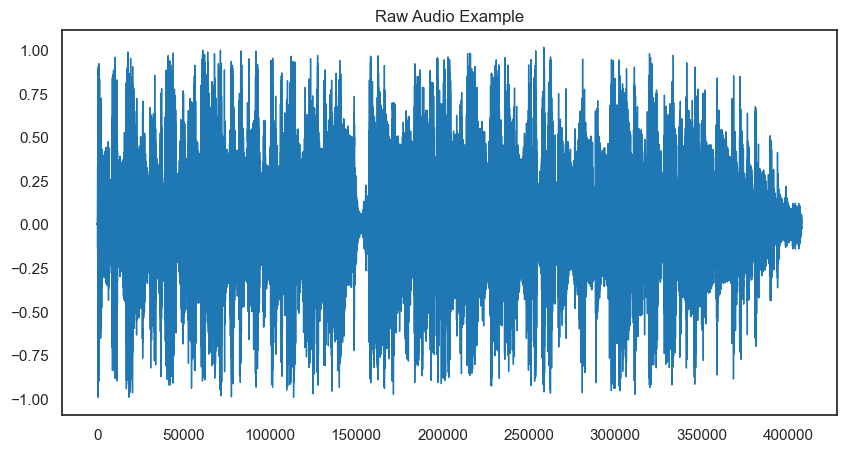

In [5]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()


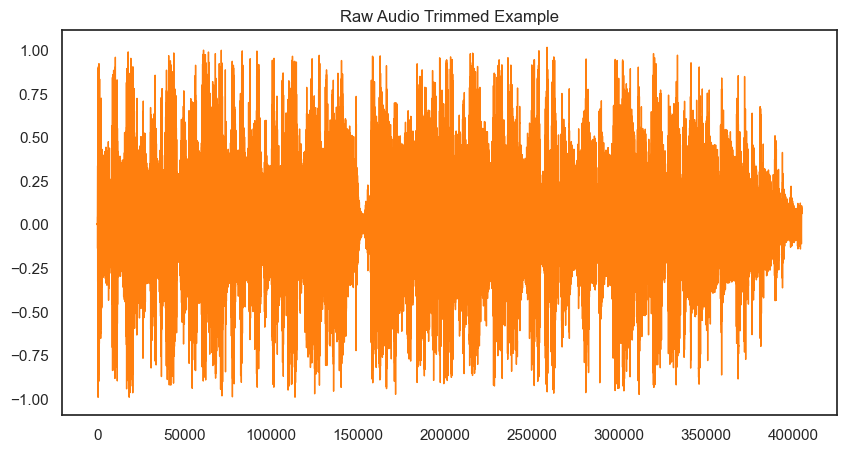

In [6]:
# Trimming leading/lagging silence
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed Example',
                 color=color_pal[1])
plt.show()

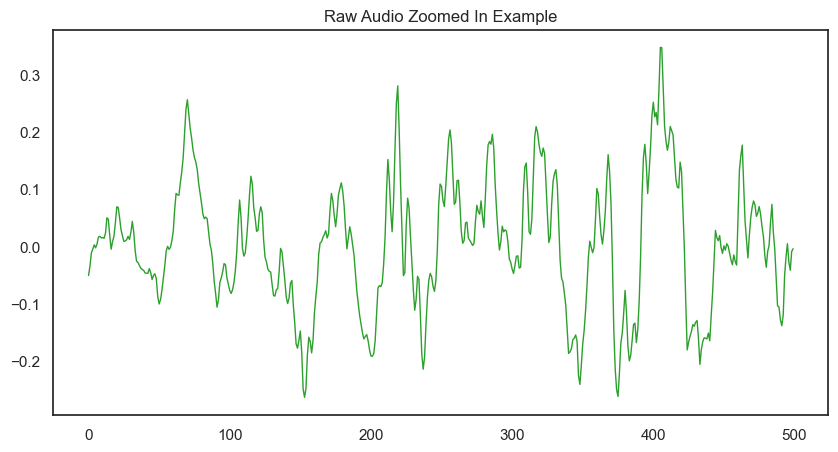

In [7]:
pd.Series(y[30000:30500]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In Example',
                 color=color_pal[2])
plt.show()

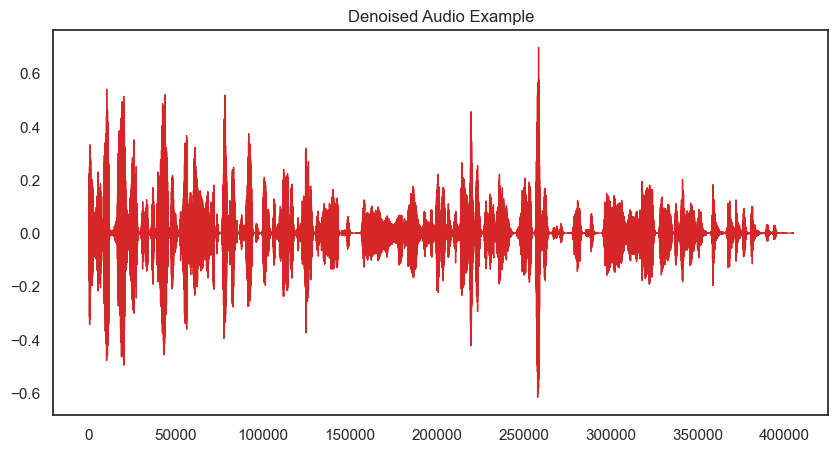

In [15]:
# Import noisereduce library
import noisereduce as nr

# Reduce noise using noisereduce
reduced_noise = nr.reduce_noise(y_trimmed, sr)

# Plot the denoised audio
pd.Series(reduced_noise).plot(figsize=(10, 5),
                  lw=1,
                  title='Denoised Audio Example',
                 color=color_pal[3])
plt.show()

# Save the denoised audio to a WAV file
wavfile.write("D:/wavesync/lis_denoised.wav", sr, reduced_noise)


In [16]:
import librosa
import numpy as np

def extract_mfccs(audio_path):
    # Load the audio signal
    y, sr = librosa.load(audio_path)

    # Extract Mel-frequency cepstral coefficients
    mfccs = librosa.feature.mfcc(y, sr=sr, n_mfcc=20)

    # Return the MFCCs as a 2D array
    return mfccs.T

# Example usage
audio_path = "D:/wavesync/lis.wav"
mfccs = extract_mfccs(audio_path)
print(mfccs.shape)  # Output: (20, 407925)

TypeError: mfcc() takes 0 positional arguments but 1 positional argument (and 2 keyword-only arguments) were given

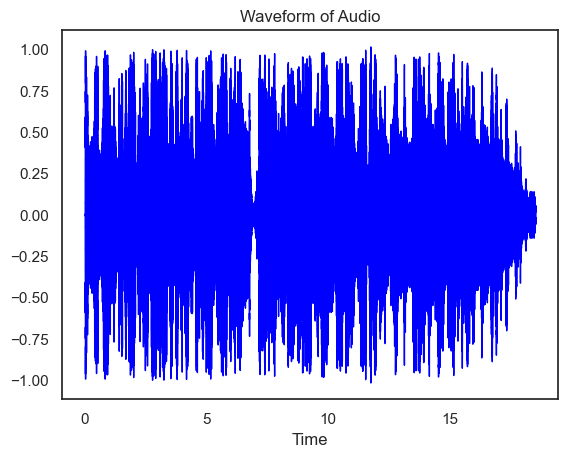

In [9]:
librosa.display.waveshow(y, sr=sr,color="b")
plt.title("Waveform of Audio")
plt.show()

In [10]:
# Normalize audio intensity using librosa.core.power_to_db
audio = librosa.core.power_to_db(y)

In [11]:
# Remove silence using a silence threshold
audio = librosa.effects.trim(audio)